In [228]:
# Импорты

import math
import numpy as np
import pandas as pd
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from time import time 

import holidays
import prophet
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_percentage_error


In [229]:
# from google.oauth2 import service_account

# pd.set_option('display.max_columns', 599)
# pd.set_option('display.max_rows', 599)

# project_id = 'kolesa-android-app'
# credentials = 'C:/kolesa-android-app-715adc9bdf26.json'
# credentials = service_account.Credentials.from_service_account_file(credentials)

In [230]:
# q = """SELECT * FROM `kolesa-android-app.academy.time_series_dataset` ORDER BY 1"""

In [231]:
# data = pd.read_gbq(query=q, project_id=project_id, credentials=credentials, dialect='standard', progress_bar_type='tqdm') # Запрос данных из GBQ

In [232]:
#ЕСЛИ У ВАС НЕТ ДОСТУПА К BQ, ТО МОЖНО ЗАГРУЗИТЬ ДАННЫЕ ЧЕРЕЗ CSV

data = pd.read_csv('Data/data.csv')
data

,event_date,y
0,2022-01-19,15360
1,2022-11-08,19712
2,2021-06-07,12801
3,2021-03-28,12801
4,2021-04-15,13314
...,...,...
1091,2022-07-24,15103
1092,2022-02-28,15615
1093,2021-10-31,16383
1094,2021-12-01,16918


In [233]:
data.sort_values(by='event_date', inplace=True)
data

,event_date,y
376,2020-01-01,5721
345,2020-01-02,8274
532,2020-01-03,9344
574,2020-01-04,9864
843,2020-01-05,10435
...,...,...
623,2022-12-27,17042
285,2022-12-28,16195
495,2022-12-29,14966
56,2022-12-30,13070


In [234]:
data.dtypes

event_date    object
y              int64
dtype: object

In [235]:
data['event_date'] = pd.to_datetime(data['event_date'])
data.dtypes

event_date    datetime64[ns]
y                      int64
dtype: object

In [236]:
data.columns = ['ds', 'y']
data.head()

,ds,y
376,2020-01-01,5721
345,2020-01-02,8274
532,2020-01-03,9344
574,2020-01-04,9864
843,2020-01-05,10435


<Axes: xlabel='ds'>

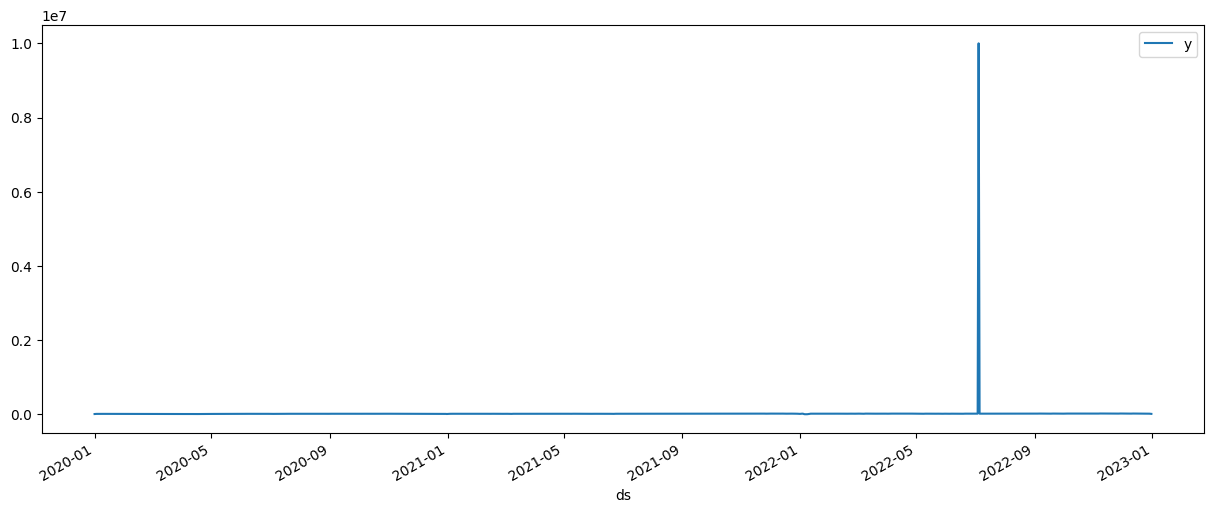

In [237]:
data.plot(x = 'ds', y = 'y', figsize=(15, 6))

In [238]:
for i in range(2):
    data.loc[data['y'].idxmax(), 'y'] = data['y'].mean()

C:\Users\lofas\AppData\Local\Temp\ipykernel_14568\1448882573.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '22644.69708029197' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['y'].idxmax(), 'y'] = data['y'].mean()


<Axes: xlabel='ds'>

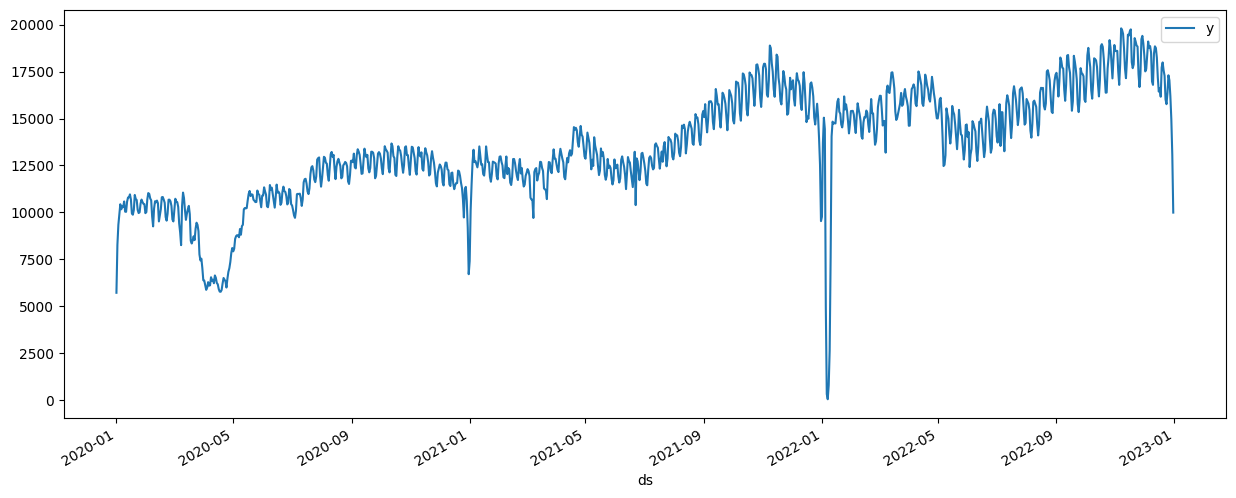

In [239]:
data.plot(x = 'ds', y = 'y', figsize=(15, 6))

In [240]:
for i in range(5):
    data.loc[data['y'].idxmin(), 'y'] = data['y'].mean()

<Axes: xlabel='ds'>

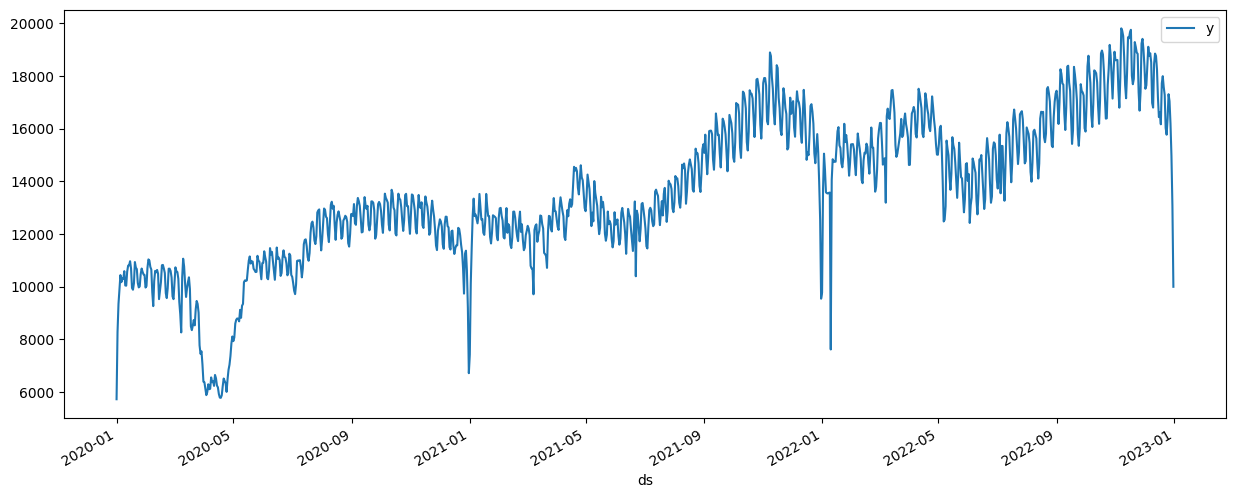

In [241]:
data.plot(x = 'ds', y = 'y', figsize=(15, 6))

<Axes: xlabel='ds', ylabel='y'>

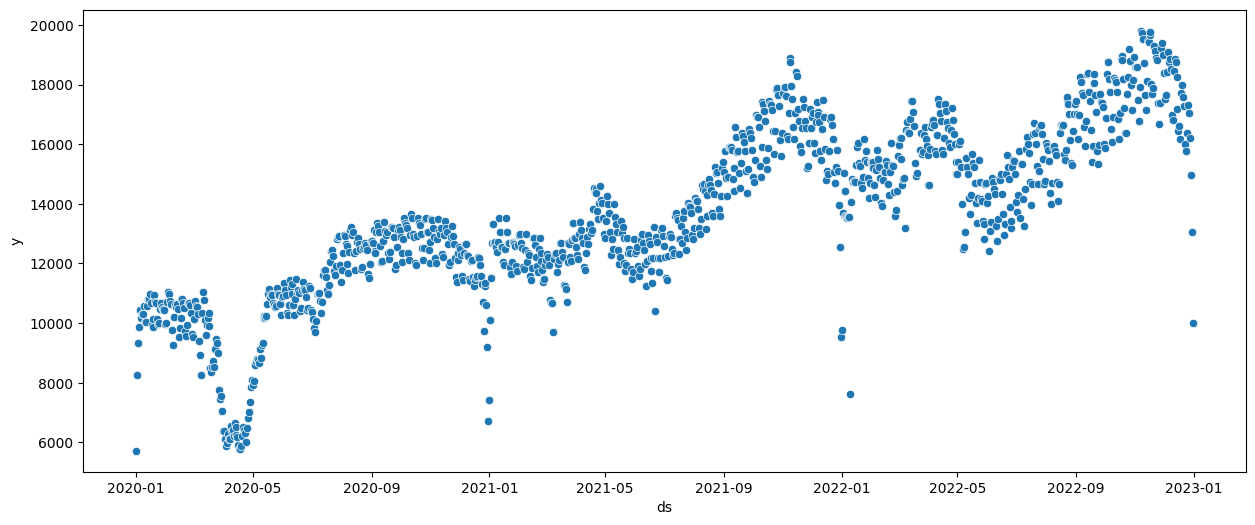

In [242]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x = 'ds', y = 'y', data = data)

In [243]:
holidays_kz = holidays.KZ(years = (2020, 2021, 2022, 2023))
df_holidays = pd.DataFrame.from_dict(holidays_kz, orient='index').rename(columns={0: 'holiday'})
df_holidays['ds'] = df_holidays.index
# df_holidays.index = df_holidays['ds']
df_holidays.head()

,holiday,ds
2020-01-01,New Year,2020-01-01
2020-01-02,New Year,2020-01-02
2020-01-07,Orthodox Christmas,2020-01-07
2020-03-08,International Women's Day,2020-03-08
2020-03-22,Nauryz holiday,2020-03-22


In [244]:
# data['year'] = data['ds'].dt.year
# data['month'] = data['ds'].dt.month
# data['day'] = data['ds'].dt.day


Epoch 0, MSE: 192499967.98348215
Epoch 50, MSE: 51518850.08528002
Epoch 100, MSE: 51141528.33007182
Epoch 150, MSE: 50934975.29255039
Epoch 200, MSE: 50729611.89378687
Epoch 250, MSE: 50525228.67260815
Epoch 300, MSE: 50321820.70583493
Epoch 350, MSE: 50119383.33955502
Epoch 400, MSE: 49917911.942359924
Epoch 450, MSE: 49717401.90494096
Epoch 500, MSE: 49517848.63998395
Epoch 550, MSE: 49319247.58206383
Epoch 600, MSE: 49121594.18754043
Epoch 650, MSE: 48924883.93445451
Epoch 700, MSE: 48729112.32242371
Epoch 750, MSE: 48534274.87254093
Epoch 800, MSE: 48340367.127270415
Epoch 850, MSE: 48147384.650346644
Epoch 900, MSE: 47955323.02667263
Epoch 950, MSE: 47764177.86221884
Final m: 627.2956272606338, Final b: 662.2038949095353


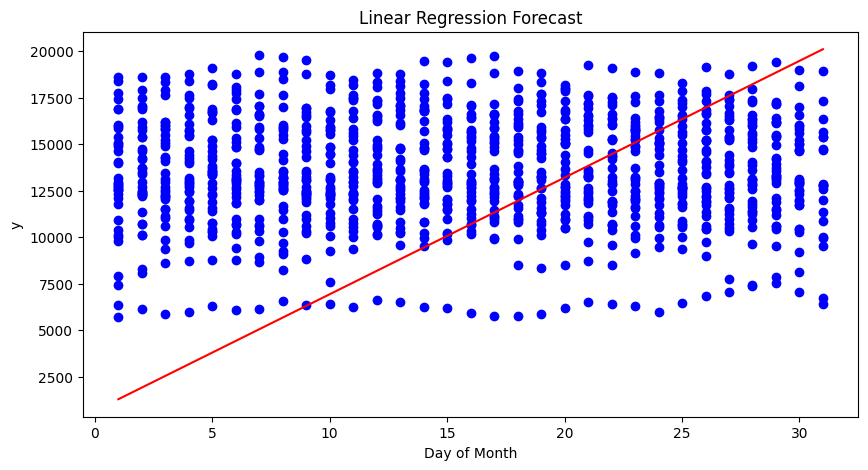

In [246]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

def mean_squared_error(m, b, points):
    total_error = 0
    for i in range(0, len(points)):
        x = points.iloc[i].day_of_month
        y = points.iloc[i].y

        total_error += (y - (m*x + b))**2
    return total_error / float(len(points))

def gradient_descent_step(m_now, b_now, points, L):
    m_grad = 0
    b_grad = 0

    n = len(points)
    for i in range(n):
        x = points.iloc[i].day_of_month
        y = points.iloc[i].y

        m_grad += -(2/n) * x * (y - (m_now*x + b_now))
        b_grad += -(2/n) * (y - (m_now*x + b_now))

    m = m_now - m_grad * L
    b = b_now - b_grad * L
    return m, b

# Добавляем новые столбцы
data['day_of_month'] = data['ds'].dt.day
data['day_of_week'] = data['ds'].dt.dayofweek

m = 0 
b = 0
L = 0.0001
epochs = 1000

for i in range(epochs):
    if i % 50 == 0:
        print(f'Epoch {i}, MSE: {mean_squared_error(m, b, data)}')
    m, b = gradient_descent_step(m, b, data, L)

print(f'Final m: {m}, Final b: {b}')

# Визуализация
plt.figure(figsize=(10, 5))
plt.scatter(data['day_of_month'], data['y'], color='blue')
plt.plot(data['day_of_month'], m*data['day_of_month'] + b, color='red')
plt.xlabel('Day of Month')
plt.ylabel('y')
plt.title('Linear Regression Forecast')
plt.show()

In [245]:
# import pandas as pd
# from datetime import datetime

# def mean_squared_error(m, b, points):
#     total_error = 0
#     for i in range(0, len(points)):
#         x = points.iloc[i].ds
#         y = points.iloc[i].y

#         total_error += (y - (m*x + b))**2
#     return total_error / float(len(points))

# def gradient_descent_step(m_now, b_now, points, L):
#     m_grad = 0
#     b_grad = 0

#     n = len(points)
#     for i in range(n):
#         x = points.iloc[i].ds
#         y = points.iloc[i].y

#         m_grad += -(2/n) * x * (y - (m_now*x + b_now))
#         b_grad += -(2/n) * (y - (m_now*x + b_now))

#     m = m_now - m_grad * L
#     b = b_now - b_grad * L
#     return m, b

# m = 0 
# b = 0
# L = 0.0001
# epochs = 1000

# for i in range(epochs):
#     if i % 50 == 0:
#         print(f'Epoch {i}, MSE: {mean_squared_error(m, b, data)}')
#     m, b = gradient_descent_step(m, b, data, L)

# print(f'Final m: {m}, Final b: {b}')

TypeError: unsupported operand type(s) for *: 'int' and 'Timestamp'